In [10]:
from ServiceNowData import ServiceNowHTTPXClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [11]:
#client = ServiceNowHTTPXClient()
#response = client.healthCheck() # always run to make sure the instance is awake

In [12]:
# grab our major incident data
"""response = client.getData('incident','major_incident_state=accepted', {
    'sysparm_display_value':True,
    'sysparm_exclude_reference_link':True,
    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'
    })"""

#data = response.json()['result']
#df = pd.DataFrame(data)
#df.head(5)

"response = client.getData('incident','major_incident_state=accepted', {\n    'sysparm_display_value':True,\n    'sysparm_exclude_reference_link':True,\n    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'\n    })"

In [13]:
rate = 20 # average number of events per year
size = 20
# stable, shift, breakdown

z = np.random.exponential(1./rate, size=size)*365
print(f'mean: {np.mean(z)}')
print(f'max: {np.max(z)}')
print(f'min: {np.min(z)}')
print(f'std: {np.std(z)}')
df = pd.Timestamp('today').normalize() - pd.to_timedelta(24*60*60*np.cumsum(z), unit='s')
df

mean: 18.409462257176962
max: 67.29018636717574
min: 0.07305753892021244
std: 18.32535864897749


DatetimeIndex(['2023-05-18 20:29:57.298510985',
               '2023-05-18 18:44:45.127148278',
               '2023-04-25 18:41:49.649165472',
               '2023-04-22 23:20:40.378411735',
               '2023-02-14 16:22:48.276287751',
               '2023-02-08 13:45:05.969877675',
               '2023-02-04 08:30:19.376694355',
               '2023-02-02 19:16:35.788398445',
               '2023-01-28 14:36:16.451381242',
               '2022-12-31 09:37:22.719731944',
               '2022-12-17 09:29:43.072513338',
               '2022-12-13 15:01:23.048718980',
               '2022-12-09 23:14:32.520292750',
               '2022-12-01 20:34:04.288619693',
               '2022-11-10 05:25:57.787863079',
               '2022-10-03 10:24:40.736169831',
               '2022-09-15 19:46:09.337626316',
               '2022-08-05 10:00:28.344159625',
               '2022-07-13 11:59:23.170935679',
               '2022-05-21 19:27:29.219598208'],
              dtype='datetime64[ns]', f

<Axes: >

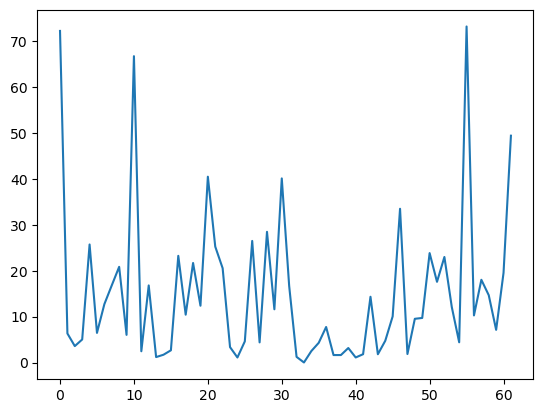

In [14]:
rates = [20,  5, 20, 80, 20]
sizes = [20,  2, 10, 10, 20]

from ServiceNowFaker import simulateArrivals
from datetime import datetime

arrivalDF = pd.DataFrame(simulateArrivals(rates, sizes))
arrivalDF = arrivalDF.rename(columns={0: "Opened"})
arrivalDF['Delta'] = -arrivalDF["Opened"].diff()
arrivalDF.loc[0,'Delta'] = datetime.today()-arrivalDF.iloc[0]['Opened'] # time difference from today

# reversing the data doesn't seem to change the chart.
display(((arrivalDF)['Delta'].astype('timedelta64[s]')/(24*60*60)).plot.line()) 

In [15]:
display(arrivalDF)

,Opened,Delta
0,2023-03-14 08:22:16.209490390,72 days 04:24:38.645842610
1,2023-03-08 00:19:02.637942449,6 days 08:03:13.571547941
2,2023-03-04 10:15:04.561572890,3 days 14:03:58.076369559
3,2023-02-27 09:35:40.615808140,5 days 00:39:23.945764750
4,2023-02-01 16:40:22.666729502,25 days 16:55:17.949078638
...,...,...
57,2021-01-24 13:01:21.335125968,18 days 00:29:02.111080184
58,2021-01-09 21:04:51.270176411,14 days 15:56:30.064949557
59,2021-01-02 18:11:04.794603959,7 days 02:53:46.475572452
60,2020-12-14 05:25:54.979950100,19 days 12:45:09.814653859


In [21]:
numbersLength = len(arrivalDF.index)
for index, row in arrivalDF.iterrows():
    # "2017-09-15 22:41:36"
    break


2023-03-14 08:22:16
